In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv("cubic_zirconia.csv")

In [39]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [40]:
df.tail()   # to view ending rows

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [41]:
df.sample(10)      # to view random data from the dataset

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
23986,23987,1.21,Premium,J,SI2,60.8,58.0,6.93,6.88,4.19,3984
18928,18929,0.54,Ideal,D,SI1,61.7,55.0,5.23,5.27,3.24,1650
16312,16313,1.26,Very Good,I,VS1,61.8,61.0,6.90,6.95,4.28,6566
12227,12228,1.01,Ideal,E,SI1,62.0,57.0,6.38,6.45,3.98,5235
23375,23376,0.41,Ideal,F,VVS1,62.3,57.0,4.73,4.77,2.96,1295
26544,26545,1.01,Good,F,VS1,64.0,56.0,6.37,6.32,4.06,5786
17072,17073,0.30,Very Good,G,VS2,63.5,59.0,4.22,4.17,2.66,644
21143,21144,1.50,Very Good,J,VS1,NaN,57.0,7.24,7.20,4.57,8896
3590,3591,0.30,Premium,D,SI1,62.2,61.0,4.28,4.24,2.65,709
18336,18337,0.91,Ideal,J,VS1,60.7,57.0,6.23,6.26,3.79,3267


In [42]:
df.shape          # to view how big your data is

(26967, 11)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


# Data Preprocessing

In [44]:
df = df.drop('Unnamed: 0', axis = 1)

In [45]:
df.isna().sum()     # This is to find null values according to columns

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [46]:
df=df.dropna()

### As we can see there is no null values in our dataset

In [47]:
df.duplicated().sum()

34

In [48]:
df=df.drop_duplicates()

### As we can see there is no duplicate values in our dataset


# Exploratory Data Analysis

In [49]:
df.describe()

,carat,depth,table,x,y,z,price
count,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000
mean,0.797620,61.745285,57.455877,5.728646,5.732487,3.536339,3935.926818
std,0.476691,1.412243,2.230866,1.126332,1.165283,0.698608,4019.809223
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2374.000000
75%,1.050000,62.500000,59.000000,6.540000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,8.060000,18818.000000


<Axes: xlabel='cut', ylabel='count'>

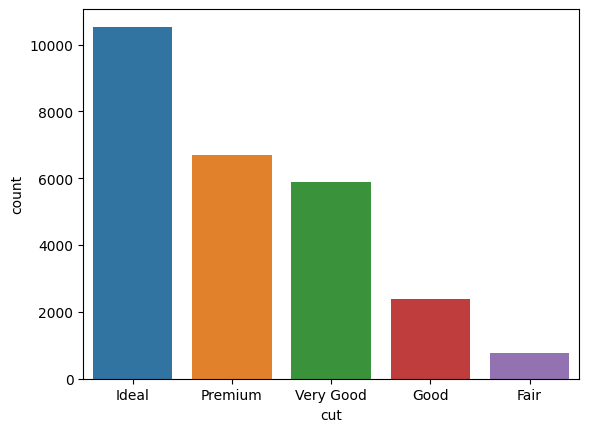

In [50]:
sns.countplot(x=df["cut"],data = df)

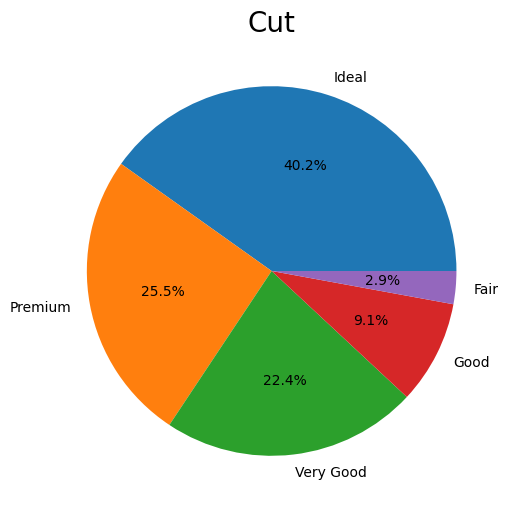

In [51]:
plt.figure(figsize=(6,6))

plt.pie(df['cut'].value_counts(), labels=df['cut'].value_counts().index, autopct="%0.1f%%",textprops={"fontsize":10})
plt.title('Cut', size=20) 
plt.show()

In [52]:
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create a histogram using plt.hist
plt.figure(figsize=(15, 5))
plt.hist(churn_df['Age'], bins=bin_edges, edgecolor='k', alpha=0.7)

# Customize the plot
plt.title("Which of the most age people", fontsize=15)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.grid(axis="y")

# Add labels to the x-axis based on the bin edges
plt.xticks(bin_edges)

plt.show()

NameError: name 'churn_df' is not defined

<Figure size 1500x500 with 0 Axes>

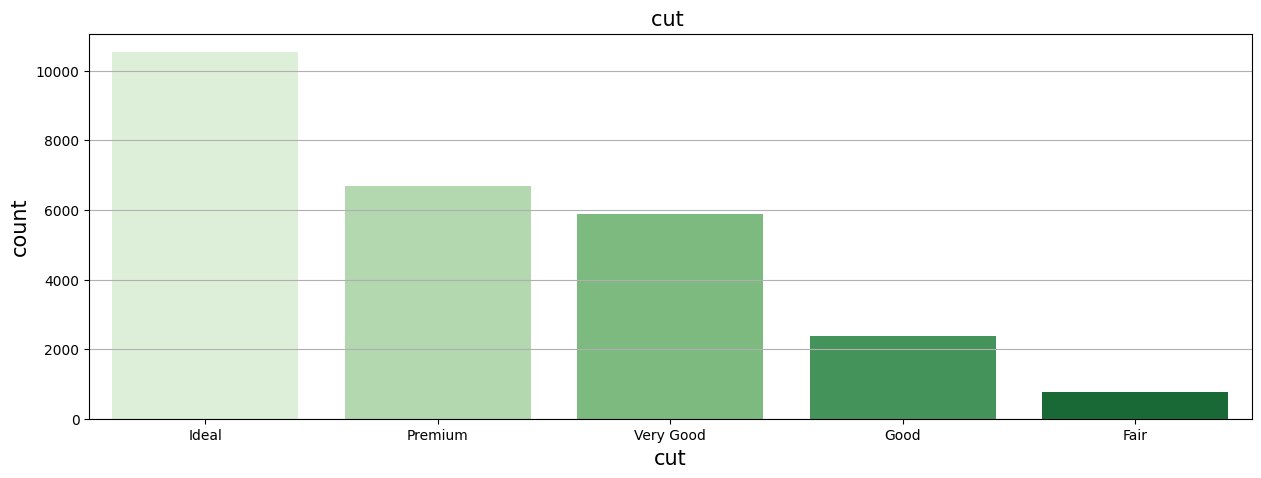

In [53]:
plt.figure(figsize=(15,5))
sns.countplot(x="cut",data=df,palette="Greens")
plt.title("cut ",fontsize=15)
plt.xlabel("cut",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.grid(axis="y")
plt.show()

<Axes: xlabel='carat', ylabel='Count'>

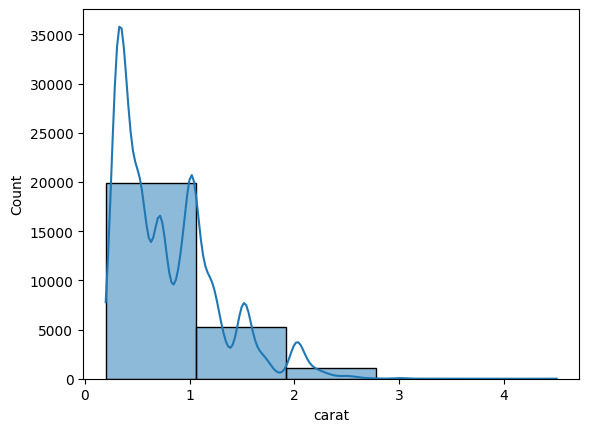

In [54]:
sns.histplot(df['carat'], kde = True, bins =5 , palette = 'hls')

<Axes: xlabel='carat', ylabel='Density'>

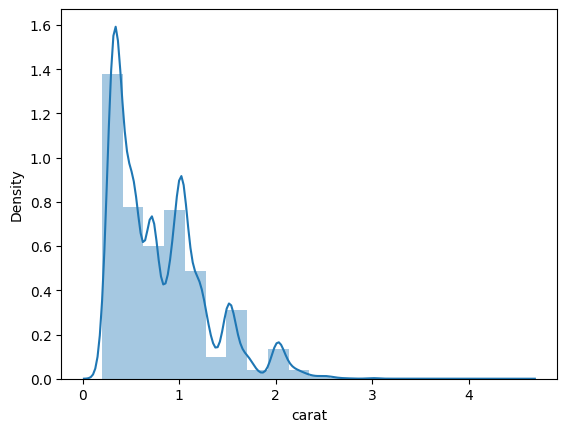

In [55]:
sns.distplot(df['carat'], kde = True, bins = 20)


In [56]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df

,carat,depth,table,x,y,z,price
0,0.30,62.1,58.0,4.27,4.29,2.66,499
1,0.33,60.8,58.0,4.42,4.46,2.70,984
2,0.90,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...
26962,1.11,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,61.8,56.0,4.19,4.20,2.60,682


# *** Finding outliers ***


## For Numerical values


<Axes: xlabel='carat'>

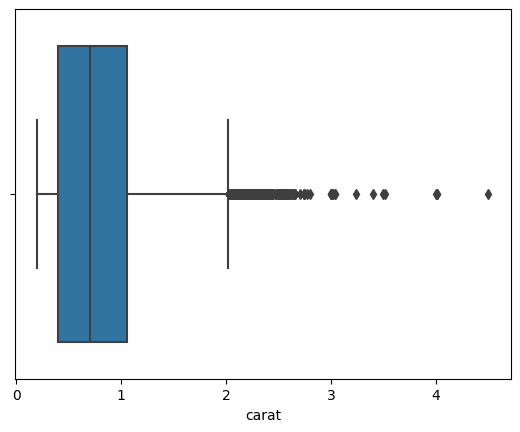

In [57]:
sns.boxplot(x="carat",data=df)

<Axes: xlabel='depth'>

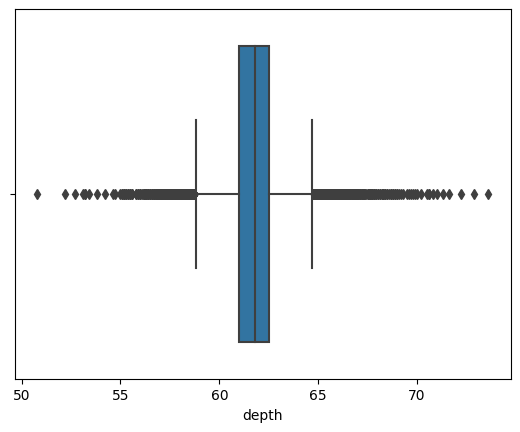

In [58]:
sns.boxplot(x="depth",data=df)

<Axes: xlabel='table'>

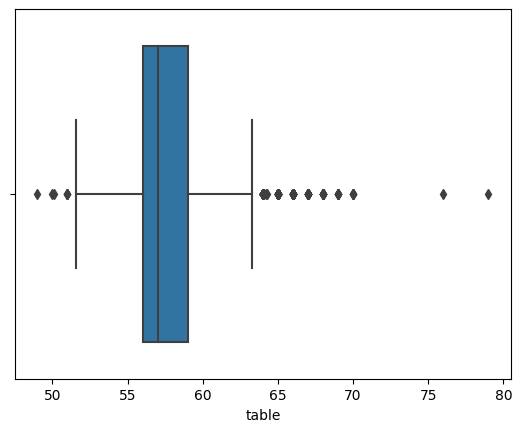

In [59]:
sns.boxplot(x="table",data=df)

# Feature engineering


In [60]:
df_new = df

In [61]:
df_new = df_new.drop(df_new[df_new["x"]==0].index)
df_new = df_new.drop(df_new[df_new["y"]==0].index)
df_new = df_new.drop(df_new[df_new["z"]==0].index)

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
l1 = df_new['cut'].unique()
cut = {}
for i in range(len(l1)):
    cut[l1[i]] = i
cut
    

{'Ideal': 0, 'Premium': 1, 'Very Good': 2, 'Good': 3, 'Fair': 4}

In [64]:
df_new['cut'] = df_new['cut'].map(cut)


In [65]:
l2 = sorted(df_new['color'].unique())
color = {}
for i in range(len(l2)):
    color[l2[i]] = i
color

{'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [66]:
df_new['color'] = df_new['color'].map(color)

In [67]:
l3 = df_new['clarity'].unique()
clarity = {}
for i in range(len(l3)):
    clarity[l3[i]] = i
clarity

{'SI1': 0,
 'IF': 1,
 'VVS2': 2,
 'VS1': 3,
 'VVS1': 4,
 'VS2': 5,
 'SI2': 6,
 'I1': 7}

In [68]:
df_new['clarity'] = df_new['clarity'].map(clarity)


In [69]:
df_new

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,0,1,0,62.1,58.0,4.27,4.29,2.66,499
1,0.33,1,3,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,2,1,2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,0,2,3,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,0,2,4,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,1,3,0,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,0,4,1,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,1,1,5,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,2,2,2,61.8,56.0,4.19,4.20,2.60,682


In [70]:
df_new

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,0,1,0,62.1,58.0,4.27,4.29,2.66,499
1,0.33,1,3,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,2,1,2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,0,2,3,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,0,2,4,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,1,3,0,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,0,4,1,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,1,1,5,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,2,2,2,61.8,56.0,4.19,4.20,2.60,682


In [71]:
df_new = df_new.drop(df_new[df_new["x"]==0].index)
df_new = df_new.drop(df_new[df_new["y"]==0].index)
df_new = df_new.drop(df_new[df_new["z"]==0].index)

In [72]:
Q1 = df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


carat         0.65
cut           2.00
color         3.00
clarity       4.00
depth         1.50
table         3.00
x             1.83
y             1.82
z             1.14
price      4410.25
dtype: float64


In [73]:
df_new = df_new[~((df_new < (Q1 - 1.5 * IQR)) | (df_new > (Q3 + 1.5 * IQR))).any(axis = 1)]


In [74]:
df_new.shape

(23147, 10)

In [75]:
df.shape

(26236, 10)

# Analysis

<Axes: xlabel='carat'>

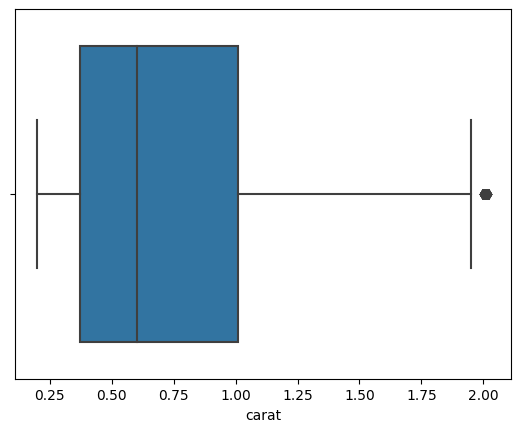

In [76]:
sns.boxplot(x="carat",data=df_new)

<Axes: xlabel='depth'>

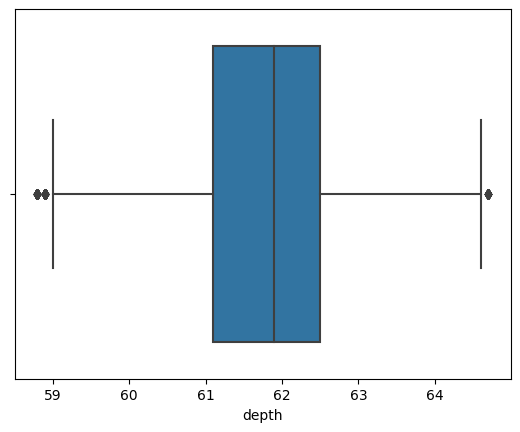

In [77]:
sns.boxplot(x="depth",data=df_new)

<Axes: xlabel='table'>

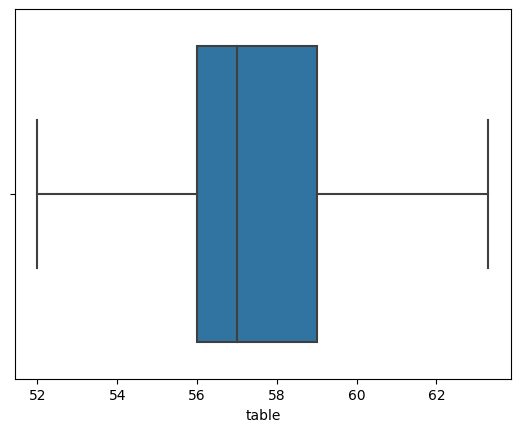

In [78]:
sns.boxplot(x="table",data=df_new)

### we can see boxplot after removing outliers for data

# Finding the correlation of data


In [79]:
num_df = df_new.select_dtypes(include='number')

In [80]:
num_df.corr()

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,0.141196,0.265842,0.095888,0.043558,0.192649,0.985870,0.984870,0.984614,0.922099
cut,0.141196,1.000000,0.020193,-0.004502,0.274426,0.416767,0.121867,0.126018,0.151569,0.080338
color,0.265842,0.020193,1.000000,-0.007021,0.051647,0.016401,0.243133,0.243175,0.246924,0.147140
clarity,0.095888,-0.004502,-0.007021,1.000000,-0.020935,0.028062,0.092400,0.090168,0.089343,0.037949
depth,0.043558,0.274426,0.051647,-0.020935,1.000000,-0.232326,-0.003490,-0.005346,0.098192,0.011483
table,0.192649,0.416767,0.016401,0.028062,-0.232326,1.000000,0.192181,0.187125,0.166296,0.143664
x,0.985870,0.121867,0.243133,0.092400,-0.003490,0.192181,1.000000,0.998392,0.993318,0.899495
y,0.984870,0.126018,0.243175,0.090168,-0.005346,0.187125,0.998392,1.000000,0.993105,0.900570
z,0.984614,0.151569,0.246924,0.089343,0.098192,0.166296,0.993318,0.993105,1.000000,0.896082
price,0.922099,0.080338,0.147140,0.037949,0.011483,0.143664,0.899495,0.900570,0.896082,1.000000


<Axes: >

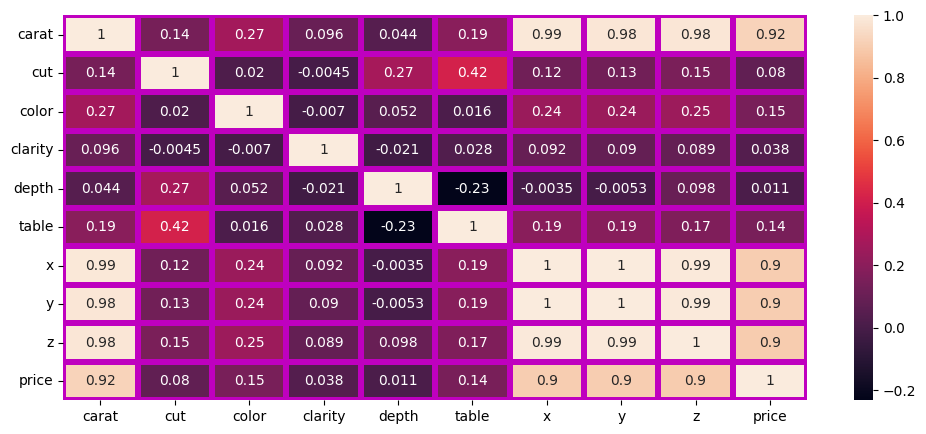

In [81]:
#hitmap
num_df = df_new.select_dtypes(include='number')
num_df.corr()
plt.figure(figsize=(12,5))
sns.heatmap(num_df.corr(),annot=True,linewidths=4,linecolor="m")

In [82]:
df_new.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,23147.000000,23147.000000,23147.000000,23147.000000,23147.000000,23147.000000,23147.000000,23147.000000,23147.000000,23147.000000
mean,0.709814,0.977837,2.546550,3.130298,61.783605,57.256686,5.546714,5.551540,3.428345,3116.194021
std,0.375796,1.016320,1.687023,2.229983,1.097150,2.014355,0.987738,0.981601,0.611349,2778.092538
min,0.200000,0.000000,0.000000,0.000000,58.800000,52.000000,3.730000,3.710000,1.530000,326.000000
25%,0.370000,0.000000,1.000000,1.000000,61.100000,56.000000,4.630000,4.640000,2.850000,884.000000
50%,0.600000,1.000000,3.000000,3.000000,61.900000,57.000000,5.420000,5.440000,3.350000,2034.000000
75%,1.010000,2.000000,4.000000,5.000000,62.500000,59.000000,6.420000,6.410000,3.980000,4660.500000
max,2.020000,4.000000,6.000000,7.000000,64.700000,63.300000,8.280000,8.390000,5.090000,11965.000000


In [83]:
X= df_new.drop('price', axis=1)
y = df_new['price']

In [84]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(X)
# X = scaler.fit_transform(X)
# pd.DataFrame(X).head()

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)


In [87]:
# scaler.fit(X_train)

In [88]:
df_new.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [89]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared score: {r2*100}")

Mean Squared Error: 954096.5727259074
R-squared score: 87.61066173295039


In [90]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared score: {r2*100}")

Mean Squared Error: 305925.4480300674
R-squared score: 96.02743163691034


In [91]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared score: {r2*100}")

Mean Squared Error: 164266.76034496565
R-squared score: 97.8669282354389


In [92]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared score: {r2*100}")

Mean Squared Error: 151926.781430047
R-squared score: 98.02716796101342


# Testing Our Application

# Enter Details

In [168]:
df.sample(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
20242,0.71,Ideal,D,SI1,63.0,55.0,5.64,5.57,3.53,2694
7990,0.64,Good,F,VS1,57.7,61.0,5.68,5.75,3.29,2222
3497,1.70,Very Good,G,VS1,63.5,56.0,7.64,7.53,4.82,15102
16211,0.56,Very Good,H,VS1,59.8,56.0,5.35,5.38,3.21,1688
1014,0.30,Ideal,H,SI1,62.9,57.0,4.31,4.28,2.70,540


In [171]:
#testing
name = input("Enter You Name :- ")
print(f"Welcome {name} Lets Check Our Customer Will Leave or not . Please enter following inputs")

carat = float(input("Enter carat :- "))
cut = int(input("Enter number for specific cut { 'Ideal': 0, 'Premium': 1, 'Very Good': 2, 'Good': 3, 'Fair': 4}"))
color = int(input("Enter number for specific color { 'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6 }"))
clarity = int(input("""Enter number for specific clarity {
                     'SI1': 0, 
                     'IF': 1,
                     'VVS2': 2,
                     'VS1': 3,
                     'VVS1': 4,
                     'VS2': 5,
                     'SI2': 6,
                     'I1': 7 } """))


depth = float(input("Enter depth :- "))
table =float(input("Enter table :- "))
x = float(input("Enter x :- "))
y = float(input("Enter y :- "))
z = float(input("Enter z :- "))


dic={'carat': [carat],
 'cut': [list({ 'Ideal': 0, 'Premium': 1, 'Very Good': 2, 'Good': 3, 'Fair': 4}.keys())[cut]],
 'color': [list({ 'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6 }.keys())[color]],
 'clarity': [list({'SI1': 0,'IF': 1,'VVS2': 2,'VS1': 3,'VVS1': 4,'VS2': 5,'SI2': 6,'I1': 7 }.keys())[clarity]],
 'depth': [depth],
 'table': [table],
 'x': [x],
 'y': [y],
 'z': [z]

}
mydf = pd.DataFrame(dic)


mydf['cut'] = mydf['cut'].map({ 'Ideal': 0, 'Premium': 1, 'Very Good': 2, 'Good': 3, 'Fair': 4})
mydf['color'] = mydf['color'].map({ 'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6 })
mydf['clarity'] = mydf['clarity'].map({'SI1': 0,'IF': 1,'VVS2': 2,'VS1': 3,'VVS1': 4,'VS2': 5,'SI2': 6,'I1': 7 })

mydf

# X_ans_scale = scaler.transform(mydf)





print(xgb_reg.predict(mydf))
# print(rf_reg.predict(mydf))
# print(reg.predict(mydf))
# print(tree_reg.predict(mydf))



Enter You Name :- ishant
Welcome ishant Lets Check Our Customer Will Leave or not . Please enter following inputs
Enter carat :- 0.36
Enter number for specific cut { 'Ideal': 0, 'Premium': 1, 'Very Good': 2, 'Good': 3, 'Fair': 4}2
Enter number for specific color { 'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6 }5
Enter number for specific clarity {
                     'SI1': 0, 
                     'IF': 1,
                     'VVS2': 2,
                     'VS1': 3,
                     'VVS1': 4,
                     'VS2': 5,
                     'SI2': 6,
                     'I1': 7 } 5
Enter depth :- 61.6
Enter table :- 58
Enter x :- 4.52
Enter y :- 4.57
Enter z :- 2.80
[502.46805]
[559.06]
[90.39096905]
[630.]


In [169]:
df.sample(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
16763,0.36,Very Good,I,VS2,61.6,58.0,4.52,4.57,2.80,505
17452,1.26,Ideal,I,SI2,59.6,57.0,7.04,7.01,4.19,4704
26805,0.31,Very Good,E,SI1,63.0,59.0,4.26,4.31,2.70,544
17364,1.56,Good,H,SI2,59.2,59.0,7.46,7.54,4.44,7554
10466,1.00,Ideal,H,SI2,58.3,61.0,6.56,6.61,3.84,4390


In [93]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [94]:
pipeline = Pipeline([('xgb_reg', xgb_reg)])

In [95]:
pipeline=Pipeline([("Model",xgb_reg)])

In [96]:
pipeline.fit(X_test,y_test)

Pipeline(steps=[('Model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [97]:
import pickle 

In [98]:
gempipe = Pipeline([("xgboost",xgb_reg)])

In [100]:
with open("gemstones.pkl","wb") as file:
    pickle.dump(gempipe,file)